In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("sales_data python.csv")
print(df.head())

         Date  Store     Category  Units_Sold  Unit_Price
0  2024-01-01    101  Electronics          30      299.99
1  2024-01-01    102     Clothing          45       49.99
2  2024-01-01    103   Home Goods          20       19.99
3  2024-01-02    101  Electronics          25      299.99
4  2024-01-02    102     Clothing          50       49.99


In [3]:
df.duplicated().sum()


np.int64(55)

In [35]:
df_clean = df.drop_duplicates()

In [5]:
df_clean.shape

(55, 5)

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        55 non-null     object 
 1   Store       55 non-null     int64  
 2   Category    55 non-null     object 
 3   Units_Sold  55 non-null     int64  
 4   Unit_Price  55 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ KB


In [7]:
df_clean.describe()

,Store,Units_Sold,Unit_Price
count,55.000000,55.000000,55.000000
mean,102.018182,35.309091,121.444545
std,0.827556,13.046743,126.292110
min,101.000000,15.000000,19.990000
25%,101.000000,25.500000,19.990000
50%,102.000000,32.000000,49.990000
75%,103.000000,43.500000,299.990000
max,103.000000,62.000000,299.990000


In [8]:
df_clean.columns.tolist()

['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price']

In [9]:
df_clean.isnull().sum()

Date          0
Store         0
Category      0
Units_Sold    0
Unit_Price    0
dtype: int64

In [10]:
#checking duplicate values 
df_clean.nunique()

Date          19
Store          3
Category       3
Units_Sold    24
Unit_Price     3
dtype: int64

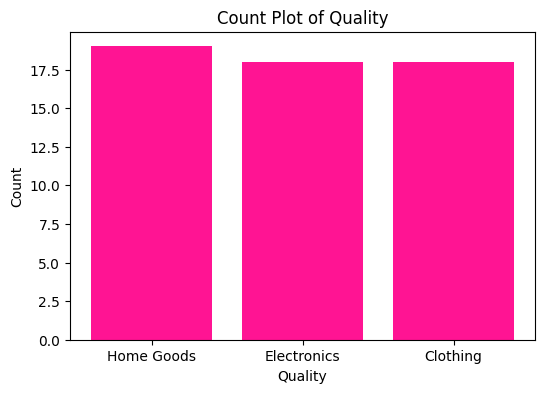

In [12]:
quality_counts = df_clean['Category'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(quality_counts.index, quality_counts.values, color='deeppink')

plt.title('Count Plot of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


In [13]:
print(df_clean.columns)


Index(['Date', 'Store', 'Category', 'Units_Sold', 'Unit_Price'], dtype='object')


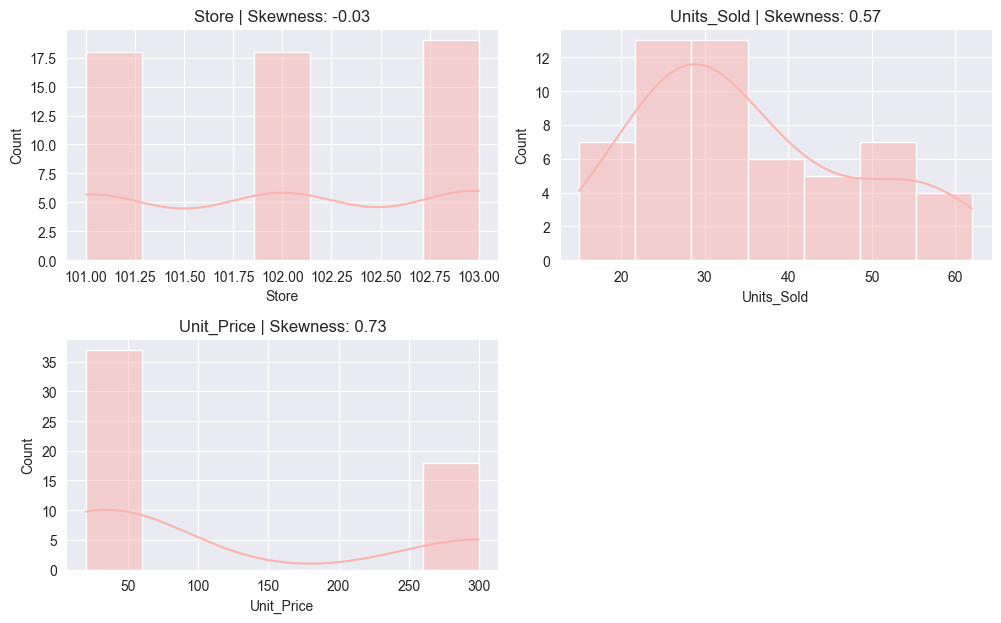

In [41]:
sns.set_style("darkgrid")

numerical_columns = df_clean.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_clean[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_clean[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\1275820095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Category", y="Units_Sold", data=df_clean, palette='viridis')


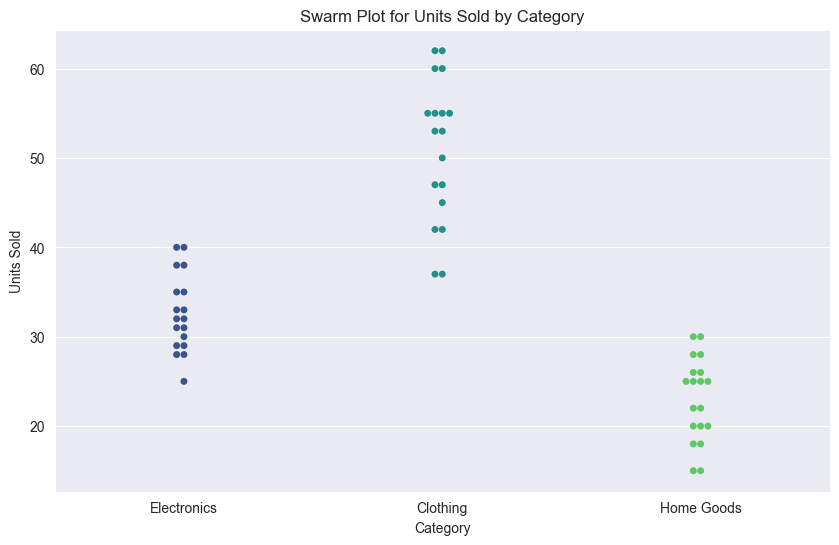

In [40]:
plt.figure(figsize=(10, 6))

sns.swarmplot(x="Category", y="Units_Sold", data=df_clean, palette='viridis')
plt.title('Swarm Plot for Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()


<Figure size 1000x600 with 0 Axes>

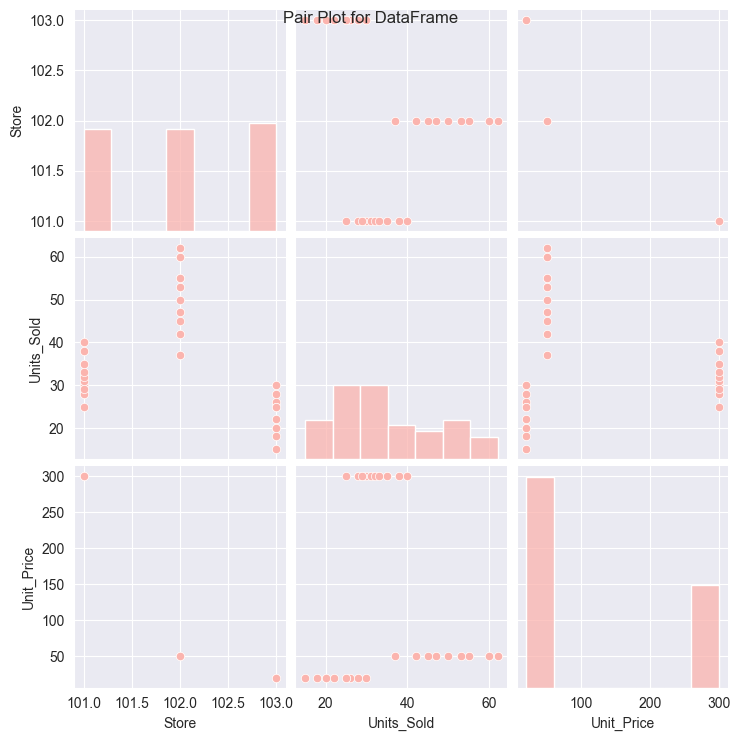

In [16]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df_clean)

plt.suptitle('Pair Plot for DataFrame')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\336691387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Category'] = df_clean['Category'].astype(str)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\336691387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Category", y="Units_Sold", data=df_clean, palette='viridis', alpha=0.7)


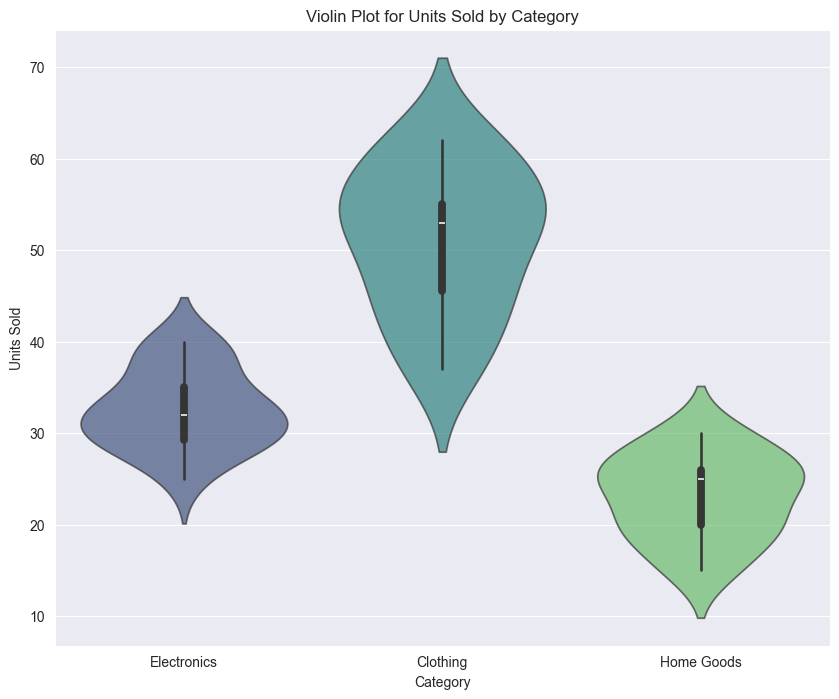

In [17]:
df_clean['Category'] = df_clean['Category'].astype(str)  

plt.figure(figsize=(10, 8))

sns.violinplot(x="Category", y="Units_Sold", data=df_clean, palette='viridis', alpha=0.7)
plt.title('Violin Plot for Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()


<Axes: xlabel='Category', ylabel='Units_Sold'>

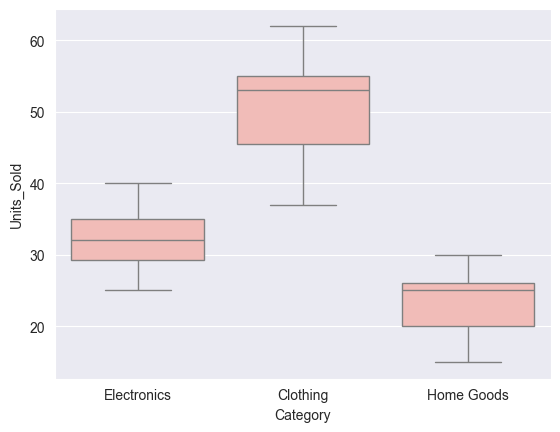

In [18]:
sns.boxplot(x='Category', y='Units_Sold', data=df_clean)


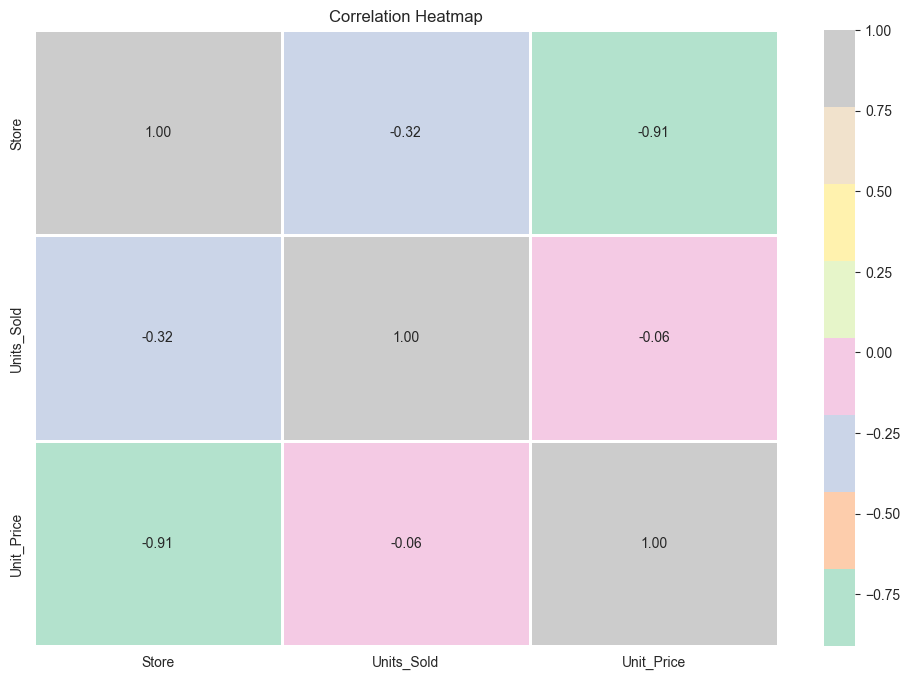

In [39]:
df_numeric = df_clean.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()


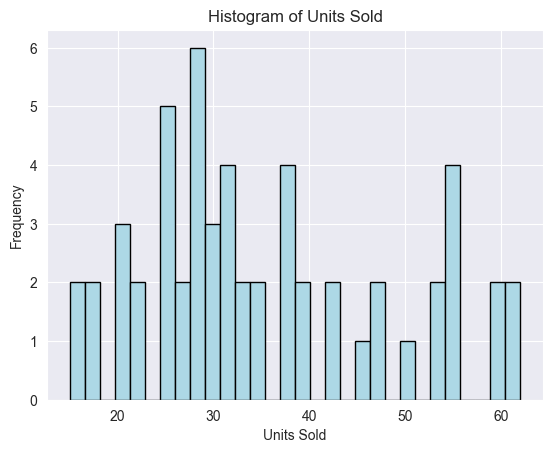

In [20]:
df_clean['Units_Sold'].hist(bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\1199239894.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_clean['Units_Sold'], shade=True, color='r')


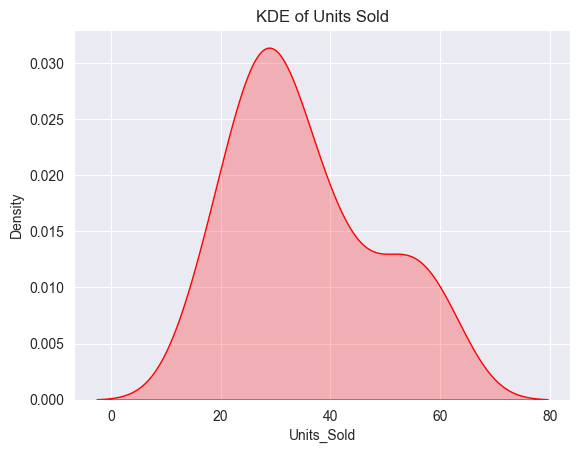

In [21]:
sns.kdeplot(df_clean['Units_Sold'], shade=True, color='r')
plt.title('KDE of Units Sold')
plt.show()


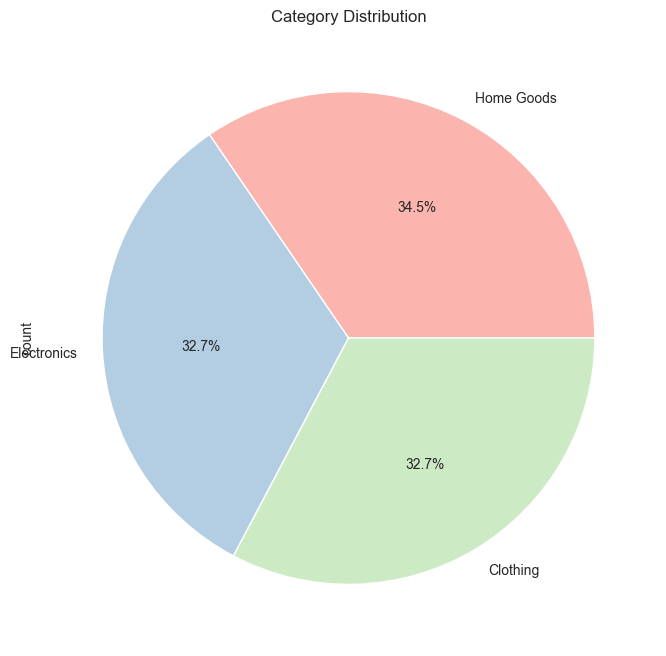

In [22]:
df_clean['Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Category Distribution')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\234098164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


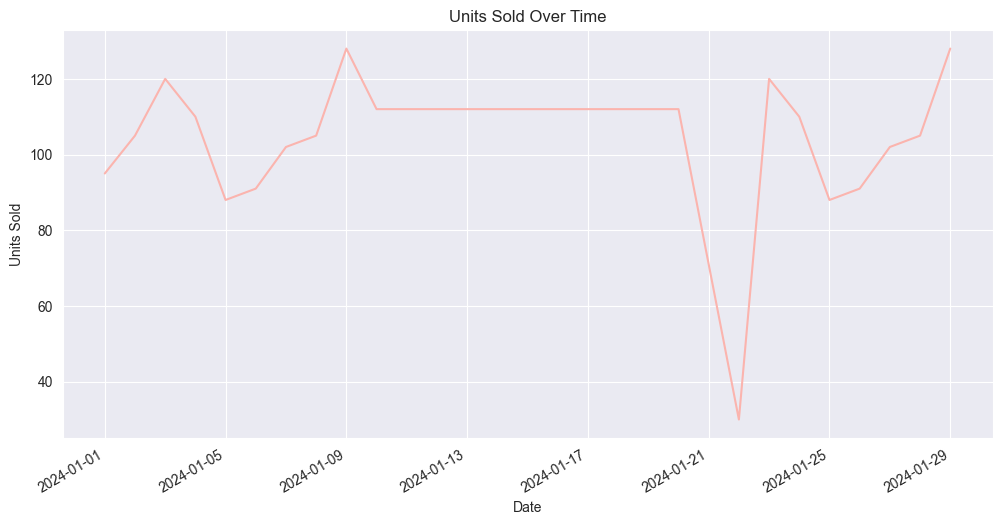

In [36]:

df_clean['Date'] = pd.to_datetime(df_clean['Date']) 
df_clean.groupby('Date')['Units_Sold'].sum().plot(figsize=(12, 6))
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()



C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\2488130686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\2488130686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()


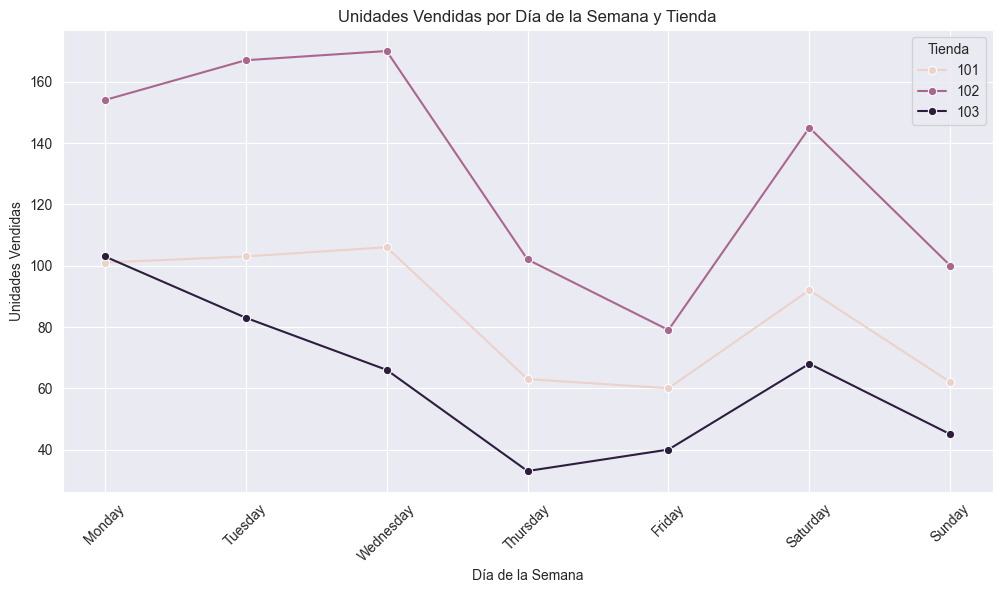

In [37]:

df_clean['Date'] = pd.to_datetime(df_clean['Date']) 
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()
df_grouped = df_clean.groupby(['Store', 'DayOfWeek'])['Units_Sold'].sum().reset_index()
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped['DayOfWeek'] = pd.Categorical(df_grouped['DayOfWeek'], categories=order_days, ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='DayOfWeek', y='Units_Sold', hue='Store', marker="o")
plt.title('Unidades Vendidas por Día de la Semana y Tienda')
plt.xlabel('Día de la Semana')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Tienda")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\3210633225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_2824\3210633225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()


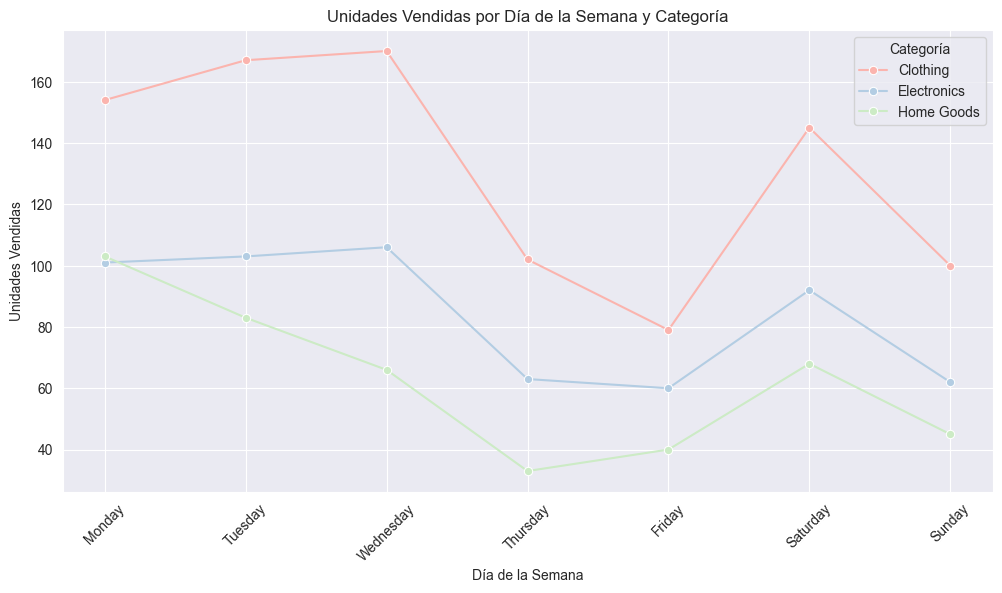

In [38]:

df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean['DayOfWeek'] = df_clean['Date'].dt.day_name()
df_grouped = df_clean.groupby(['Category', 'DayOfWeek'])['Units_Sold'].sum().reset_index()
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped['DayOfWeek'] = pd.Categorical(df_grouped['DayOfWeek'], categories=order_days, ordered=True)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='DayOfWeek', y='Units_Sold', hue='Category', marker="o")
plt.title('Unidades Vendidas por Día de la Semana y Categoría')
plt.xlabel('Día de la Semana')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Categoría")
plt.show()